<a href="https://colab.research.google.com/github/Regina-Arthur/YOLOv1_From_Scratch/blob/main/YOLOv1_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a YOLOv1 model from scratch by Regina Arthur


###This will be done without the convolutional layers being pretrained on imagenet

##Import the necessary libraries


In [1]:
#Let's import the necessary libraries to build YOLOv1
#with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import VOCDetection
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from tqdm import tqdm

##Connect To a GPU if available

In [2]:
#Let's check if cuda is available and connect to it.
#If it is not available, use cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

##Load the Semantic Boundaries Dataset


### Create a folder to store the Semantic Boundaries Dataset

In [1]:
# #Let's import the necessary libraries for creating a folder in google drive
# from google.colab import drive
# import os

# #Let's mount Google Drive
# drive.mount('/content/drive')

# def determinedirectory(directory):
#   #Let's define folder path in Google Drive
#   location = directory.upper()
#   root ='/content/drive/MyDrive/_Dataset/'
#   new_root = root + location
#   #Let's check if the folder exists, if not, let's create it
#   if not os.path.exists(new_root):
#       os.makedirs(new_root)
#       print(f"Created new folder: {new_root}")
#   else:
#       print(f"Folder already exists: {new_root}")
#   return new_root


Mounted at /content/drive


In [2]:
# ! pip install -q kaggle

In [ ]:
import os

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d vijayabhaskar96/pascal-voc-2007-and-2012


# output_dir = determinedirectory("PascalVOC2007_and_2012")


# !unzip "pascal-voc-2007-and-2012.zip" -d "$output_dir"

##Neural Network Architecture


###I am following the documentation on the MODULE class to build my neural network. All neural network model are to inherit from the nn.Module class.

####Conv2d
####class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

####class torch.nn.LeakyReLU(negative_slope=0.01, inplace=False)

####MaxPool2d
####class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)[source]

####Linear
####class torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)[source]

####Dropout2d
####class torch.nn.Dropout2d(p=0.5, inplace=False)[source]



In [3]:
class YOLOv1(nn.Module):
  def __init__(self, S=7, B=2, C=20):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3,out_channels = 64, kernel_size = 7,stride = 2, padding = 3)
    self.conv2 = nn.Conv2d(in_channels = 64,out_channels = 192, kernel_size = 3, stride = 1, padding = 1)
    self.conv3 = nn.Conv2d(in_channels = 192,out_channels = 128, kernel_size = 1,stride = 1, padding = 0)
    self.conv4 = nn.Conv2d(in_channels = 128,out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
    self.conv5 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 1, stride = 1, padding = 0)
    self.conv6 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 1)
    self.conv7 = nn.Conv2d(in_channels = 512, out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv8 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3, stride = 1, padding = 1)
    self.conv9 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv10 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding =1)
    self.conv11 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv12 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding = 1)
    self.conv13 = nn.Conv2d(in_channels = 512,out_channels = 256, kernel_size = 1,stride = 1, padding = 0)
    self.conv14 = nn.Conv2d(in_channels = 256,out_channels = 512, kernel_size = 3,stride = 1, padding = 1)
    self.conv15 = nn.Conv2d(in_channels = 512,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv16 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv17 = nn.Conv2d(in_channels = 1024,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv18 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv19 = nn.Conv2d(in_channels = 1024,out_channels = 512, kernel_size = 1,stride = 1, padding = 0)
    self.conv20 = nn.Conv2d(in_channels = 512,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv21 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv22 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 2, padding = 1)
    self.conv23 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)
    self.conv24 = nn.Conv2d(in_channels = 1024,out_channels = 1024, kernel_size = 3,stride = 1, padding = 1)

    #Pooling and Activation
    self.MaxPooling2d = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.LeakyReLU = nn.LeakyReLU(negative_slope = 0.1)

    #Flattening and Fully Connected Layer
    self.Flatten = nn.Flatten()
    self.Linear = nn.Linear(in_features = 50176 , out_features = 4096)
    self.Dropout = nn.Dropout2d(0.5)
    self.Linear2 = nn.Linear(in_features =4096 , out_features = S * S * ( B * 5 + C))

  def forward(self, x):
    x = self.MaxPooling2d(self.LeakyReLU(self.conv1(x)))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv2(x)))
    x = self.LeakyReLU(self.conv3(x))
    x = self.LeakyReLU(self.conv4(x))
    x = self.LeakyReLU(self.conv5(x))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv6(x)))
    x = self.LeakyReLU(self.conv7(x))
    x = self.LeakyReLU(self.conv8(x))
    x = self.LeakyReLU(self.conv9(x))
    x = self.LeakyReLU(self.conv10(x))
    x = self.LeakyReLU(self.conv11(x))
    x = self.LeakyReLU(self.conv12(x))
    x = self.LeakyReLU(self.conv13(x))
    x = self.LeakyReLU(self.conv14(x))
    x = self.LeakyReLU(self.conv15(x))
    x = self.MaxPooling2d(self.LeakyReLU(self.conv16(x)))
    x = self.LeakyReLU(self.conv17(x))
    x = self.LeakyReLU(self.conv18(x))
    x = self.LeakyReLU(self.conv19(x))
    x = self.LeakyReLU(self.conv20(x))
    x = self.LeakyReLU(self.conv21(x))
    x = self.LeakyReLU(self.conv22(x))
    x = self.LeakyReLU(self.conv23(x))
    x = self.LeakyReLU(self.conv24(x))
    x = self.LeakyReLU(self.Linear(self.Flatten(x)))
    x = self.Dropout(x)
    x = self.Linear2(x)
    return x



## Architecture Test
This just makes sure the architecture works as intended


In [ ]:
# model = YOLOv1()
# model = model.to(device)

In [ ]:
# dummy_input = torch.randn(1, 3, 448, 448).to(device)

# with torch.no_grad():
#     output = model(dummy_input)

# print("Output shape:", output.shape)

Output shape: torch.Size([1, 1470])


/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
# total_params = sum(p.numel() for p in model.parameters())
# trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# print(f"Total params: {total_params:,}")
# print(f"Trainable params: {trainable_params:,}")

Total params: 271,703,550
Trainable params: 271,703,550


##Model loss
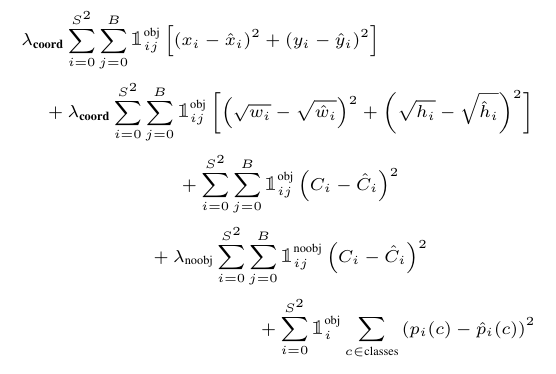

In [ ]:
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
  if box_format == "midpoint":
    box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
    box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
    box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
    box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
    box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
    box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
    box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
    box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2


  if box_format == "corners":
    box1_x1 = boxes_preds[..., 0:1]
    box1_y1 = boxes_preds[..., 1:2]
    box1_x2 = boxes_preds[..., 2:3]
    box1_y2 = boxes_preds[..., 3:4]
    box2_x1 = boxes_preds[..., 0:1]
    box2_y1 = boxes_preds[..., 1:2]
    box2_x2 = boxes_preds[..., 2:3]
    box2_y2 = boxes_preds[..., 3:4]

  x1 = torch.max(box1_x1, box2_x1)
  y1 = torch.max(box1_y1, box2_y1)
  x2 = torch.min(box1_x2, box2_x2)
  y2 = torch.min(box1_y2, box2_y2)

  intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)

  box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
  box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

  return intersection / (box1_area + box2_area - intersection + 1e-6)

In [ ]:
def nms(bboxes, iou_threshold, threshold, box_format="corners"):
  assert type(bboxes) == list

  bboxes = [box for box in bboxes if box[1] > threshold]
  bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
  bboxes_after_nms = []

  while bboxes:
      chosen_box = bboxes.pop(0)

      bboxes = [
          box
          for box in bboxes
          if box[0] != chosen_box[0]
          or intersection_over_union(
              torch.tensor(chosen_box[2:]),
              torch.tensor(box[2:]),
              box_format=box_format,
          )
          < iou_threshold
      ]

      bboxes_after_nms.append(chosen_box)

  return bboxes_after_nms

In [ ]:
def mean_average_precision(pred_boxes, true_boxes,
                           iou_threshold=0.5,
                           box_format="midpoint",
                           num_classes=20
                           ):
  # list storing all AP for respective classes
  average_precisions = []

  # used for numerical stability later on
  epsilon = 1e-6

  for c in range(num_classes):
      detections = []
      ground_truths = []

      # Go through all predictions and targets,
      # and only add the ones that belong to the
      # current class c
      for detection in pred_boxes:
          if detection[1] == c:
              detections.append(detection)

      for true_box in true_boxes:
          if true_box[1] == c:
              ground_truths.append(true_box)

      # find the amount of bboxes for each training example
      # Counter here finds how many ground truth bboxes we get
      # for each training example, so let's say img 0 has 3,
      # img 1 has 5 then we will obtain a dictionary with:
      # amount_bboxes = {0:3, 1:5}
      amount_bboxes = Counter([gt[0] for gt in ground_truths])

      # We then go through each key, val in this dictionary
      # and convert to the following (w.r.t same example):
      # ammount_bboxes = {0:torch.tensor[0,0,0], 1:torch.tensor[0,0,0,0,0]}
      for key, val in amount_bboxes.items():
          amount_bboxes[key] = torch.zeros(val)

      # sort by box probabilities which is index 2
      detections.sort(key=lambda x: x[2], reverse=True)
      TP = torch.zeros((len(detections)))
      FP = torch.zeros((len(detections)))
      total_true_bboxes = len(ground_truths)

      # If none exists for this class then we can safely skip
      if total_true_bboxes == 0:
          continue

      for detection_idx, detection in enumerate(detections):
          # Only take out the ground_truths that have the same
          # training idx as detection
          ground_truth_img = [
              bbox for bbox in ground_truths if bbox[0] == detection[0]
          ]

          num_gts = len(ground_truth_img)
          best_iou = 0

          for idx, gt in enumerate(ground_truth_img):
              iou = intersection_over_union(
                  torch.tensor(detection[3:]),
                  torch.tensor(gt[3:]),
                  box_format=box_format,
              )

              if iou > best_iou:
                  best_iou = iou
                  best_gt_idx = idx

          if best_iou > iou_threshold:
              # only detect ground truth detection once
              if amount_bboxes[detection[0]][best_gt_idx] == 0:
                  # true positive and add this bounding box to seen
                  TP[detection_idx] = 1
                  amount_bboxes[detection[0]][best_gt_idx] = 1
              else:
                  FP[detection_idx] = 1

          # if IOU is lower then the detection is a false positive
          else:
              FP[detection_idx] = 1

      TP_cumsum = torch.cumsum(TP, dim=0)
      FP_cumsum = torch.cumsum(FP, dim=0)
      recalls = TP_cumsum / (total_true_bboxes + epsilon)
      precisions = TP_cumsum / (TP_cumsum + FP_cumsum + epsilon)
      precisions = torch.cat((torch.tensor([1]), precisions))
      recalls = torch.cat((torch.tensor([0]), recalls))
      # torch.trapz for numerical integration
      average_precisions.append(torch.trapz(precisions, recalls))

  return sum(average_precisions) / len(average_precisions)


In [ ]:
class YOLOv1Loss(nn.Module):
  def __init__(self, S=7, B=2, C=20, λ_coord=5, λ_noobj=0.5):
    super().__init__()
        self.S = S
        self.B = B
        self.C = C
        self.lambda_coord = λ_coord
        self.lambda_noobj = λ_noobj

  def forward(self, predictions, target):
    # predictions are shaped (BATCH_SIZE, S*S(C+B*5) when inputted
    predictions = predictions.reshape(-1, self.S, self.S, self.C + self.B * 5)

    # Calculate IoU for the two predicted bounding boxes with target bbox
    iou_b1 = intersection_over_union(predictions[..., 21:25], target[..., 21:25])
    iou_b2 = intersection_over_union(predictions[..., 26:30], target[..., 21:25])
    ious = torch.cat([iou_b1.unsqueeze(0), iou_b2.unsqueeze(0)], dim=0)

    # Take the box with highest IoU out of the two prediction
    # Note that bestbox will be indices of 0, 1 for which bbox was best
    iou_maxes, bestbox = torch.max(ious, dim=0)
    exists_box = target[..., 20].unsqueeze(3)  # in paper this is Iobj_i

    # ======================== #
    #   FOR BOX COORDINATES    #
    # ======================== #

    # Set boxes with no object in them to 0. We only take out one of the two
    # predictions, which is the one with highest Iou calculated previously.
    box_predictions = exists_box * (
        (
            bestbox * predictions[..., 26:30]
            + (1 - bestbox) * predictions[..., 21:25]
        )
    )

    box_targets = exists_box * target[..., 21:25]

    # Take sqrt of width, height of boxes to ensure that
    box_predictions[..., 2:4] = torch.sign(box_predictions[..., 2:4]) * torch.sqrt(
        torch.abs(box_predictions[..., 2:4] + 1e-6)
    )
    box_targets[..., 2:4] = torch.sqrt(box_targets[..., 2:4])

    box_loss = self.mse(
        torch.flatten(box_predictions, end_dim=-2),
        torch.flatten(box_targets, end_dim=-2),
    )

    # ==================== #
    #   FOR OBJECT LOSS    #
    # ==================== #

    # pred_box is the confidence score for the bbox with highest IoU
    pred_box = (
        bestbox * predictions[..., 25:26] + (1 - bestbox) * predictions[..., 20:21]
    )

    object_loss = self.mse(
        torch.flatten(exists_box * pred_box),
        torch.flatten(exists_box * target[..., 20:21]),
    )

    # ======================= #
    #   FOR NO OBJECT LOSS    #
    # ======================= #

    #max_no_obj = torch.max(predictions[..., 20:21], predictions[..., 25:26])
    #no_object_loss = self.mse(
    #    torch.flatten((1 - exists_box) * max_no_obj, start_dim=1),
    #    torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1),
    #)

    no_object_loss = self.mse(
        torch.flatten((1 - exists_box) * predictions[..., 20:21], start_dim=1),
        torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1),
    )

    no_object_loss += self.mse(
        torch.flatten((1 - exists_box) * predictions[..., 25:26], start_dim=1),
        torch.flatten((1 - exists_box) * target[..., 20:21], start_dim=1)
    )

    # ================== #
    #   FOR CLASS LOSS   #
    # ================== #

    class_loss = self.mse(
        torch.flatten(exists_box * predictions[..., :20], end_dim=-2,),
        torch.flatten(exists_box * target[..., :20], end_dim=-2,),
    )

    loss = (
        self.lambda_coord * box_loss  # first two rows in paper
        + object_loss  # third row in paper
        + self.lambda_noobj * no_object_loss  # forth row
        + class_loss  # fifth row
    )

    return loss


##Load the Pascal Visual Object Class Dataset

In [4]:
torch.manual_seed(0)
model = YOLOv1()
model = model.to(device)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#Let's reshape the images
transforms = v2.Compose([
    v2.ColorJitter(brightness=1.5, contrast=1.5, saturation=1.5),
    v2.RandomHorizontalFlip(p=0.2),
    v2.RandomVerticalFlip(p=0.2),
    v2.Resize((448,448)),
    v2.ToDtype(torch.float32, scale=True),
    ])

TrainData = torchvision.datasets.VOCDetection(
    root = '/content/drive/MyDrive/_Dataset/PASCALVOC2007_AND_2012',
    year = '2007',
    image_set = 'train',
    download = False,
    transform = transforms,
    )


Traindataloader = DataLoader(TrainData,
                             batch_size=16,
                             shuffle=True,
                             num_workers=2,
                             )

###AdamW
class torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, *, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)


In [15]:
def learning_rate(epoch, epochs):
  first_stop = 0.6 * epochs
  second_stop = 0.8 * epochs
  if epoch <= first_stop:
    return 0.1
  elif epoch <= second_stop:
    return 0.01
  else:
    return 0.001


optimizer = torch.optim.AdamW(model.parameters(),
                              lr= 0.1,
                              betas=(0.9,0.99),
                              weight_decay= 0.0005,
                              )
num_epochs = 10

In [ ]:
"""
Main file for training Yolo model on Pascal VOC dataset

"""

import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.transforms.functional as FT
from tqdm import tqdm
from torch.utils.data import DataLoader
from model import Yolov1
from dataset import VOCDataset
from utils import (
    non_max_suppression,
    mean_average_precision,
    intersection_over_union,
    cellboxes_to_boxes,
    get_bboxes,
    plot_image,
    save_checkpoint,
    load_checkpoint,
)
from loss import YoloLoss

seed = 123
torch.manual_seed(seed)

# Hyperparameters etc.
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
BATCH_SIZE = 16 # 64 in original paper but I don't have that much vram, grad accum?
WEIGHT_DECAY = 0
EPOCHS = 1000
NUM_WORKERS = 2
PIN_MEMORY = True
LOAD_MODEL = False
LOAD_MODEL_FILE = "overfit.pth.tar"
IMG_DIR = "data/images"
LABEL_DIR = "data/labels"





def train(train_loader, model, optimizer, loss_fn):
    loop = tqdm(train_loader, leave=True)
    mean_loss = []

    for batch_idx, (x, y) in enumerate(loop):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        loss = loss_fn(out, y)
        mean_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # update progress bar
        loop.set_postfix(loss=loss.item())

    print(f"Mean loss was {sum(mean_loss)/len(mean_loss)}")


def main():
    model = Yolov1().to(device)
    optimizer = optimizer
    loss = YOLOv1Loss()

    if LOAD_MODEL:
        load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)

    train_dataset = VOCDataset(
        "data/100examples.csv",
        transform=transform,
        img_dir=IMG_DIR,
        label_dir=LABEL_DIR,
    )

    test_dataset = VOCDataset(
        "data/test.csv", transform=transform, img_dir=IMG_DIR, label_dir=LABEL_DIR,
    )

    train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=BATCH_SIZE,
        num_workers=NUM_WORKERS,
        pin_memory=PIN_MEMORY,
        shuffle=True,
        drop_last=True,
    )

    test_loader = DataLoader(
        dataset=test_dataset,
        batch_size=BATCH_SIZE,
        num_workers=NUM_WORKERS,
        pin_memory=PIN_MEMORY,
        shuffle=True,
        drop_last=True,
    )

    for epoch in range(EPOCHS):
        # for x, y in train_loader:
        #    x = x.to(DEVICE)
        #    for idx in range(8):
        #        bboxes = cellboxes_to_boxes(model(x))
        #        bboxes = non_max_suppression(bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
        #        plot_image(x[idx].permute(1,2,0).to("cpu"), bboxes)

        #    import sys
        #    sys.exit()

        pred_boxes, target_boxes = get_bboxes(
            train_loader, model, iou_threshold=0.5, threshold=0.4
        )

        mean_avg_prec = mean_average_precision(
            pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint"
        )
        print(f"Train mAP: {mean_avg_prec}")

        #if mean_avg_prec > 0.9:
        #    checkpoint = {
        #        "state_dict": model.state_dict(),
        #        "optimizer": optimizer.state_dict(),
        #    }
        #    save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE)
        #    import time
        #    time.sleep(10)

        train(Traindataloader, model, optimizer, loss)


if __name__ == "__main__":
    main()

In [19]:
for epoch in range(num_epochs):
    model.train()
    optimizer.param_groups[0]['lr'] = learning_rate(epoch, num_epochs)
    for images, targets in Traindataloader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss(outputs, targets)
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([4, 5])) that is different to the input size (torch.Size([4, 1470])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (1470) must match the size of tensor b (5) at non-singleton dimension 1

In [ ]:
print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}"), torch.save(model.state_dict(), "checkpoint.pth")